<a href="https://colab.research.google.com/github/govardhan-06/practice-Notebooks/blob/main/pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

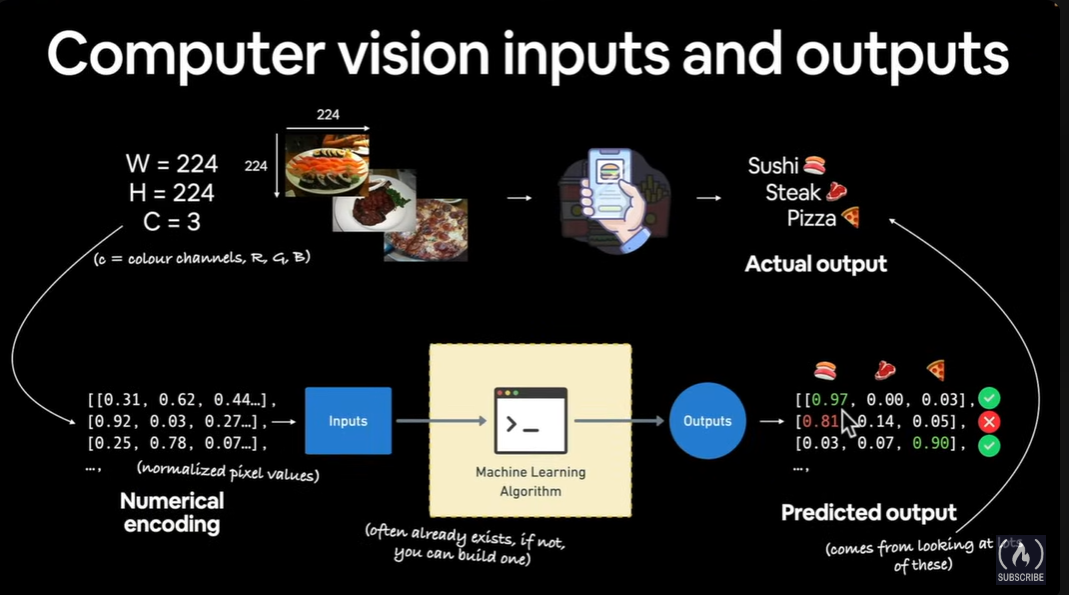

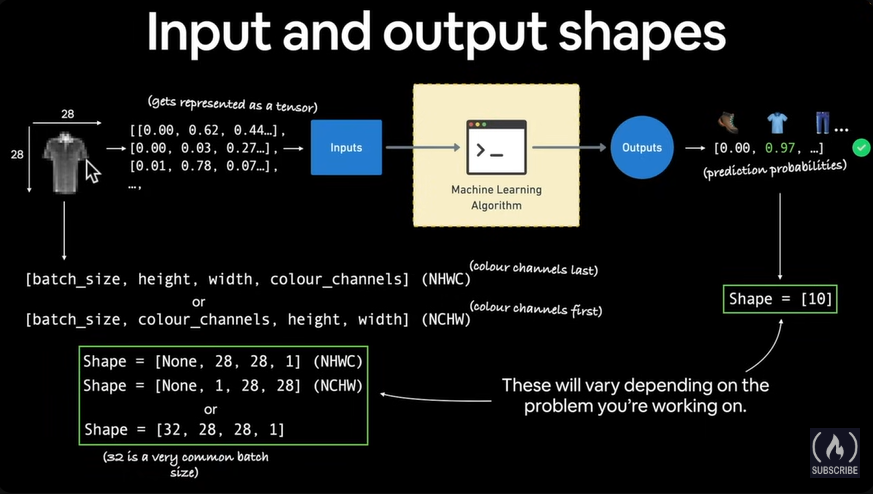

#### PyTorch Computer Vision Libraries

* `torchvision` - base library of pytorch computer vision
* `torchvision.datasets` - get datasets and data loading for computer vision
* `torchvision.models` - get pre-trained CV models
* `torchvision.transforms` - functions for manipulating your vision data for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Create Python iterable over a dataset

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.3.0+cu121
0.18.0+cu121


1. Getting a dataset

In [ ]:
train_set=torchvision.datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_set=torchvision.datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:13<00:00, 1917893.11it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 149968.97it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2738098.36it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6662226.78it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_set),len(test_set)

(60000, 10000)

In [ ]:
class_names=train_set.classes

In [ ]:
train_set.class_to_idx #Returns a dictionary

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
image,label=train_set[0]

In [ ]:
label

9

In [ ]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

### Check the input and output of data

In [ ]:
print(f"Image shape: {image.shape} -> [colour_channels,height,width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [colour_channels,height,width]
Image label: Ankle boot


* PyTorch follows colour channels first policy for representing the images wherein other frameworks use colour channel last policy

### Visualizing our data

Image shape : torch.Size([1, 28, 28])


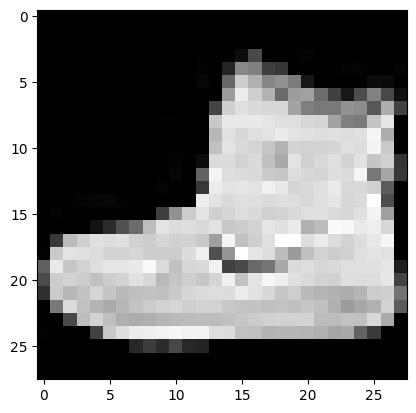

In [ ]:
import matplotlib.pyplot as plt
image,label=train_set[0]
print(f"Image shape : {image.shape}")
plt.imshow(image.squeeze(),cmap='gray')

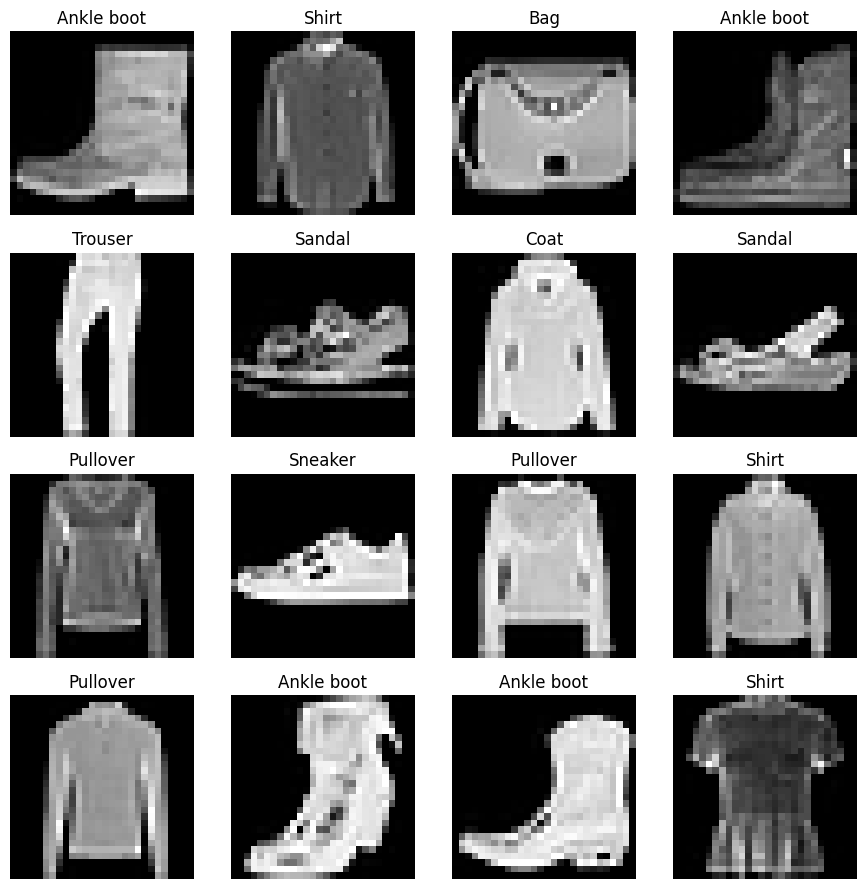

In [ ]:
import torch
import matplotlib.pyplot as plt

torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4

for i in range(1, rows*cols + 1):
    random_idx = torch.randint(0, len(train_set), size=[1]).item()
    img, label = train_set[random_idx]
    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(img.squeeze(), cmap='gray')
    ax.set_title(class_names[label])
    ax.axis('off')  # Turn off the axis

plt.tight_layout()
plt.show()

### Prepare DataLoader
* Intially the data is inform of the tensor datasets.
* Using this dataloader, the tensor.datasets will get conevrted to torch.Tensor
* batches: we will be dividing the train data to batches and it will be loaded one by one. This reduces the compute resource and the reve,

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE=32
train_dataloader=DataLoader(train_set,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader=DataLoader(test_set,batch_size=BATCH_SIZE,shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f9dc4576a70>,
 <torch.utils.data.dataloader.DataLoader at 0x7f9dc449d3c0>)

In [ ]:
print(f"DataLoaders: {train_dataloader,test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f9dc4576a70>, <torch.utils.data.dataloader.DataLoader object at 0x7f9dc449d3c0>)
Length of train dataloader: 1875 batches of 32...
Length of test dataloader: 313 batches of 32...


In [ ]:
#What's in the dataloader
train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


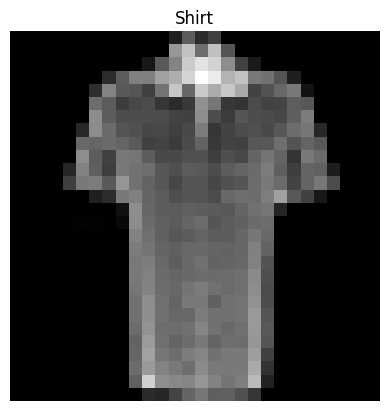

In [ ]:
#Show a sample
torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis('off')
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

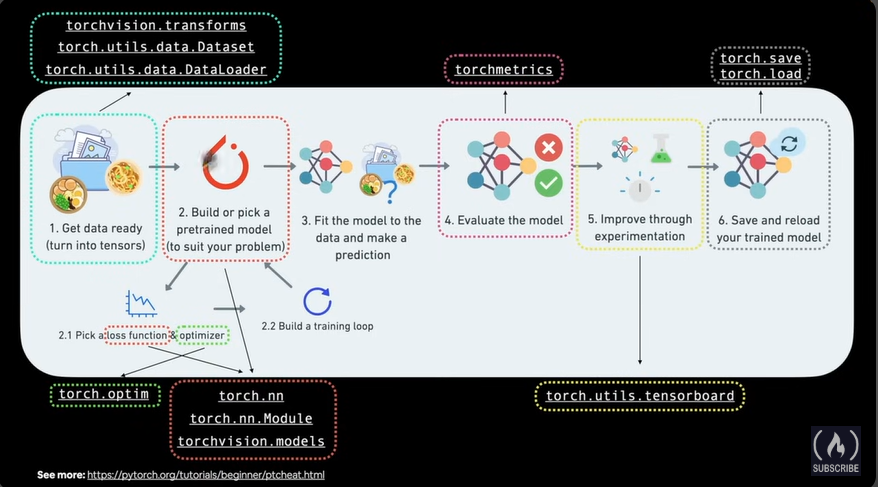

### Model 0 - Baseline model

In [ ]:
#Create a flatten layer
flatten_model=nn.Flatten()

#Get a single sample
x=train_features_batch[0]

#Flatten the sample
output=flatten_model(x)

#Check the shape of the output
print(f"Shape before flattening: {x.shape} -> (color_channels,height,weight)")
print(f"Shape after flattening: {output.shape} -> (color_channels,height*weight)")

Shape before flattening: torch.Size([1, 28, 28]) -> (color_channels,height,weight)
Shape after flattening: torch.Size([1, 784]) -> (color_channels,height*weight)


In [ ]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

model_0=FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x=torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

### Model Performance

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
start_time=timer()
##some code...
end_time=timer()
print_train_time(start=start_time, end=end_time, device=str(next(model_0.parameters()).device))

Train time on cpu: 0.000 seconds


3.887400004032315e-05

### Creating a training loop and training and training a model on batches of data

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. Print out what's happening
5. Timer

In [ ]:
next(iter(train_dataloader.dataset))

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [30]:
#tqdm for progress bar
from tqdm.auto import tqdm

#helper function
from helper_functions import accuracy_fn

torch.manual_seed(42)
train_time_on_cpu=timer()

epochs=3

#Training and Testing loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  ### Training
  train_loss=0
  #Managing the batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    #1. Forward pass
    y_pred=model_0(X)

    #2. Calculate the loss
    loss=loss_fn(y_pred, y)
    train_loss+=loss
    #train loss is getting accumulated based on each batch

    #3. Optimizer zero grad
    optimizer.zero_grad()

    #4. Loss backward
    loss.backward()

    #5. Optimizer step
    optimizer.step()

    #6. Print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  #Testing
  test_loss,test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:

      #1.Forward pass
      test_preds=model_0(X_test)

      #2.Calculate the loss
      test_loss+=loss_fn(test_preds, y_test)

      #3.Calculate the accuracy
      test_acc+=accuracy_fn(y_true=y_test, y_pred=test_preds.argmax(dim=1))

    #Calculate the test loss average per batch
    test_loss/=len(test_dataloader)
    test_acc/=len(test_dataloader)

  #Print the train and test loss
  print(f"\nTrain loss: {train_loss/len(train_dataloader):.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

  #Calculate the training time
  train_time_model_0=print_train_time(start=start_time, end=timer(), device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Train time on cpu: 866.854 seconds
Epoch: 1
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Train time on cpu: 876.135 seconds
Epoch: 2
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 885.421 seconds


### Making predictions

In [31]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn):
  """Returns the model results in a dictionary"""
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      #Make predictions
      y_pred=model(X)

      #Calculate the loss
      loss+=loss_fn(y_pred, y)

      #Calculate the accuracy
      acc+=accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    #Calculate the average loss and accuracy
    loss/=len(data_loader)
    acc/=len(data_loader)

  return{"model_name":model.__class__.__name__ , #applicable only for models created using a class
         "model_loss":loss.item(),
         "model_acc":acc
         }

model_results=eval_model(
    model=model_0,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_results


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

In [32]:
device

'cuda'

### Model 1: with non-linear functions